In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [49]:
sns.set_style("darkgrid")
sns.set_palette('rocket')

# BASIC EVALS

In [50]:
def get_means(model, loc, explicit_country, eval):
    path = f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/{model}-{loc}-{explicit_country}-20-1.0'
    
    means = [[], []]
    
    for i in range(1, 21):
        try:
            means[0].append(np.load(f'{path}/run{i}_fixed/{eval}_move1.npy').mean())
            means[1].append(np.load(f'{path}/run{i}_fixed/{eval}_move2.npy').mean())
        except:
            pass

    return means

In [55]:
gpt35t_free_False_bert = get_means('gpt3.5turbo', 'free', False, 'bert')
gpt35t_free_True_bert = get_means('gpt3.5turbo', 'free', True, 'bert')
gpt4_free_False_bert = get_means('gpt4', 'free', False, 'bert')
gpt4_free_True_bert = get_means('gpt4', 'free', True, 'bert')

In [56]:
gpt35t_free_False_bidir = get_means('gpt3.5turbo', 'free', False, 'bidir')
gpt35t_free_True_bidir = get_means('gpt3.5turbo', 'free', True, 'bidir')
gpt4_free_False_bidir = get_means('gpt4', 'free', False, 'bidir')
gpt4_free_True_bidir = get_means('gpt4', 'free', True, 'bidir')

In [60]:
gpt35t_rank_False_kendall = get_means('gpt3.5turbo', 'rank', False, 'kendall')
gpt35t_rank_True_kendall = get_means('gpt3.5turbo', 'rank', True, 'kendall')
gpt4_rank_False_kendall = get_means('gpt4', 'rank', False, 'kendall')
gpt4_rank_True_kendall = get_means('gpt4', 'rank', True, 'kendall')

In [61]:
gpt35t_rank_False_spearman = get_means('gpt3.5turbo', 'rank', False, 'spearman')
gpt35t_rank_True_spearman = get_means('gpt3.5turbo', 'rank', True, 'spearman')
gpt4_rank_False_spearman = get_means('gpt4', 'rank', False, 'spearman')
gpt4_rank_True_spearman = get_means('gpt4', 'rank', True, 'spearman')

In [62]:
gpt35t_rank_False_hamming = get_means('gpt3.5turbo', 'rank', False, 'hamming')
gpt35t_rank_True_hamming = get_means('gpt3.5turbo', 'rank', True, 'hamming')
gpt4_rank_False_hamming = get_means('gpt4', 'rank', False, 'hamming')
gpt4_rank_True_hamming = get_means('gpt4', 'rank', True, 'hamming')

# RANK PLOTTING

In [68]:
all_kendall = pd.DataFrame(
    [
        gpt35t_rank_False_kendall[0], gpt35t_rank_False_kendall[1],
        gpt35t_rank_True_kendall[0], gpt35t_rank_True_kendall[1],
        gpt4_rank_False_kendall[0], gpt4_rank_False_kendall[1],
        gpt4_rank_True_kendall[0], gpt4_rank_True_kendall[1],
    ]
).T

In [69]:
all_kendall.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [70]:
all_kendall = all_kendall.fillna(all_kendall.mean()) # fills nan values with mean of column

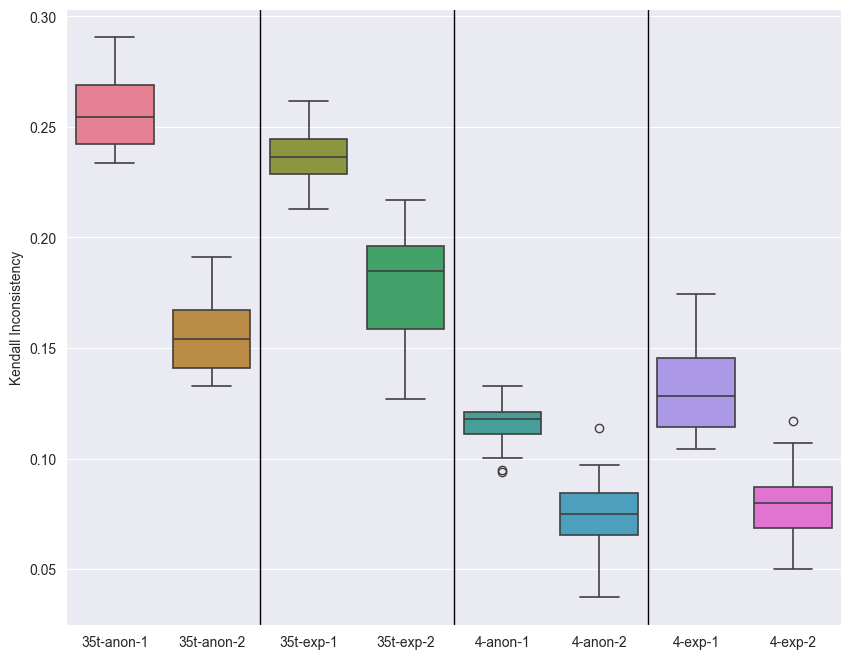

In [71]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_kendall, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

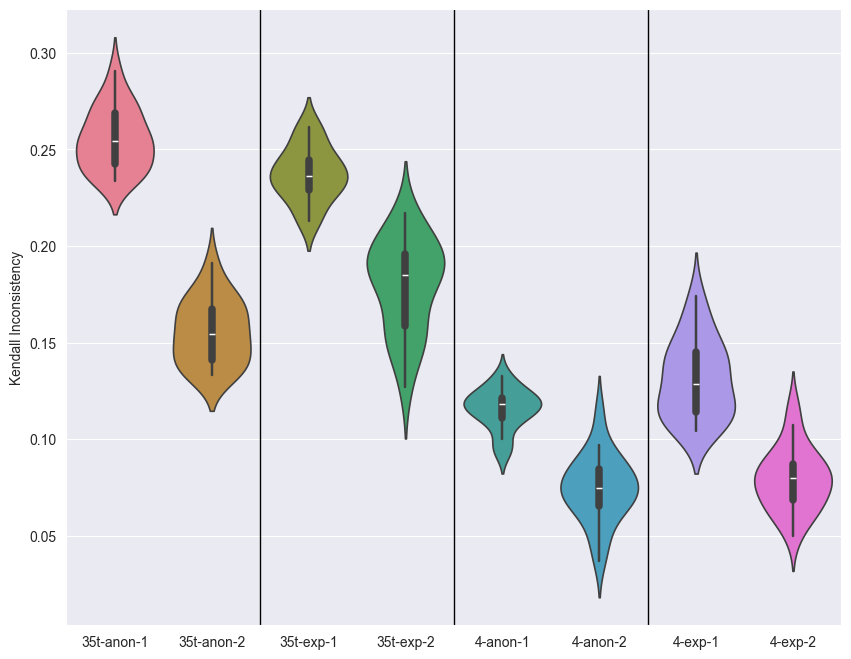

In [72]:
plt.figure(figsize=(10, 8))
sns.violinplot(all_kendall, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [73]:
all_spearman = pd.DataFrame(
    [
        gpt35t_rank_False_spearman[0], gpt35t_rank_False_spearman[1],
        gpt35t_rank_True_spearman[0], gpt35t_rank_True_spearman[1],
        gpt4_rank_False_spearman[0], gpt4_rank_False_spearman[1],
        gpt4_rank_True_spearman[0], gpt4_rank_True_spearman[1],
    ]
).T

In [74]:
all_spearman.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [75]:
all_spearman = all_spearman.fillna(all_spearman.mean()) # fills nan values with mean of column

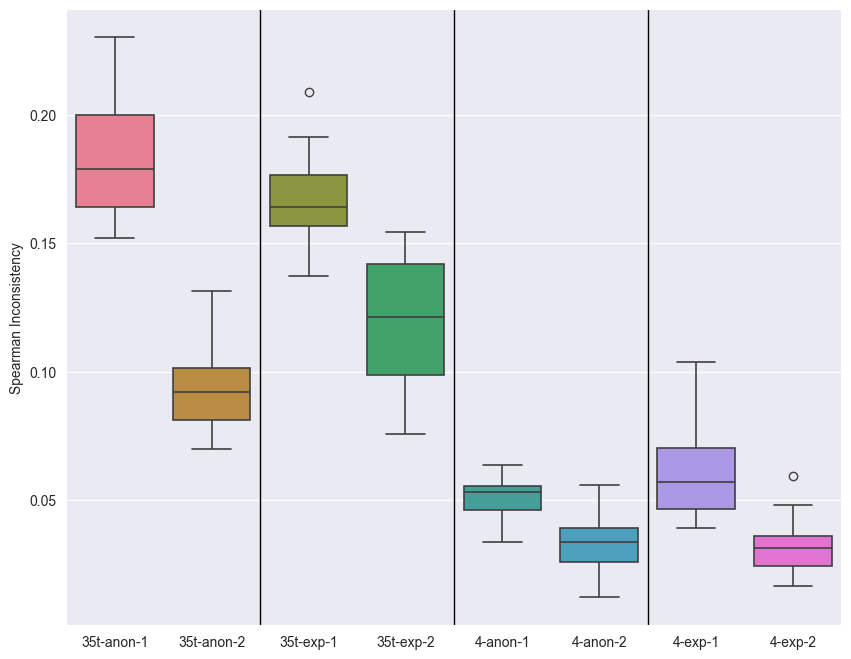

In [76]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_spearman, linewidth=1.2)
plt.ylabel('Spearman Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [81]:
all_hamming = pd.DataFrame(
    [
        gpt35t_rank_False_hamming[0], gpt35t_rank_False_hamming[1],
        gpt35t_rank_True_hamming[0], gpt35t_rank_True_hamming[1],
        gpt4_rank_False_hamming[0], gpt4_rank_False_hamming[1],
        gpt4_rank_True_hamming[0], gpt4_rank_True_hamming[1],
    ]
).T

In [82]:
all_hamming.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [83]:
all_hamming = all_hamming.fillna(all_hamming.mean()) # fills nan values with mean of column

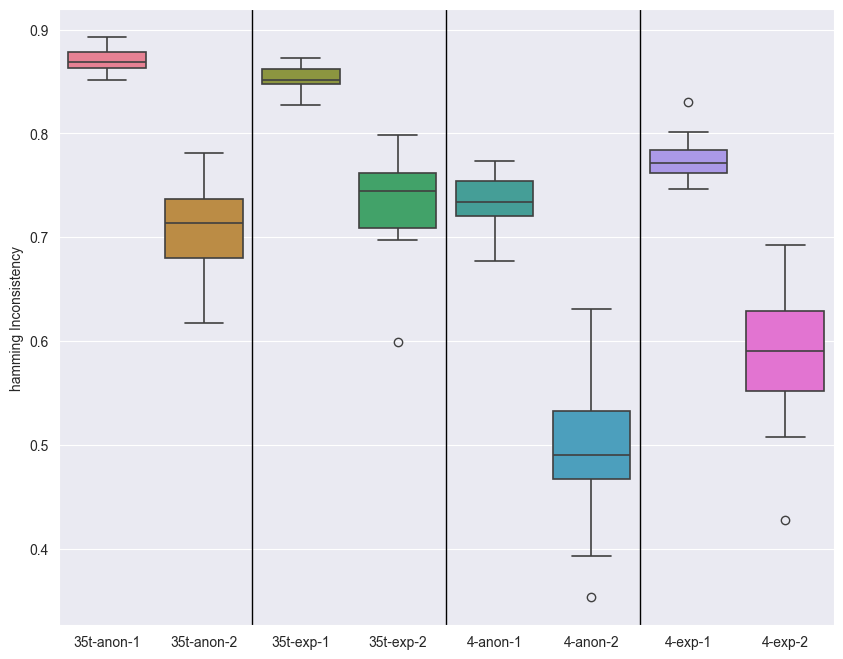

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_hamming, linewidth=1.2)
plt.ylabel('hamming Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

# BERT PLOTTING

In [86]:
all_bert = pd.DataFrame(
    [
        gpt35t_free_False_bert[0], gpt35t_free_False_bert[1],
        gpt35t_free_True_bert[0], gpt35t_free_True_bert[1],
        gpt4_free_False_bert[0], gpt4_free_False_bert[1],
        gpt4_free_True_bert[0], gpt4_free_True_bert[1],
    ]
).T

In [87]:
all_bert.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

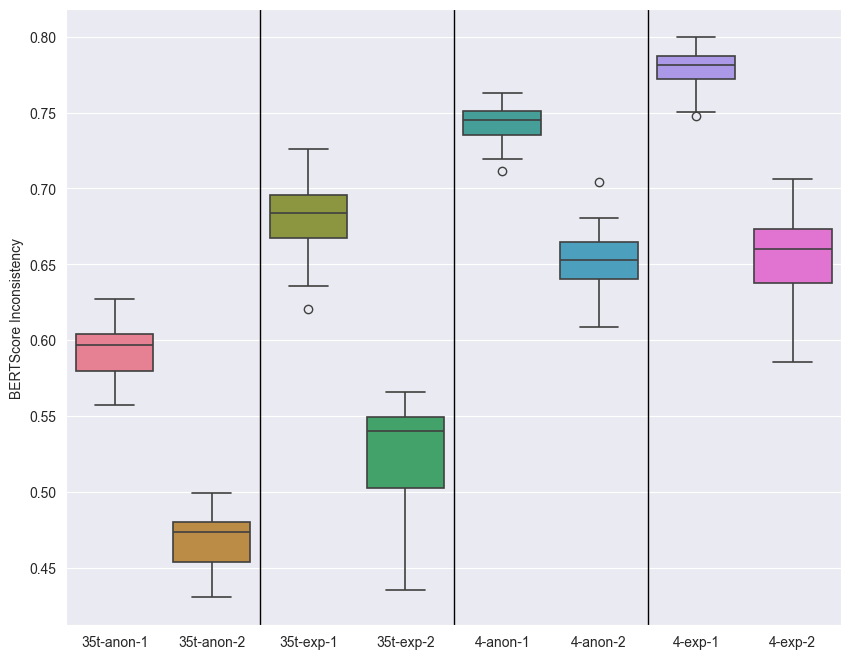

In [88]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_bert, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

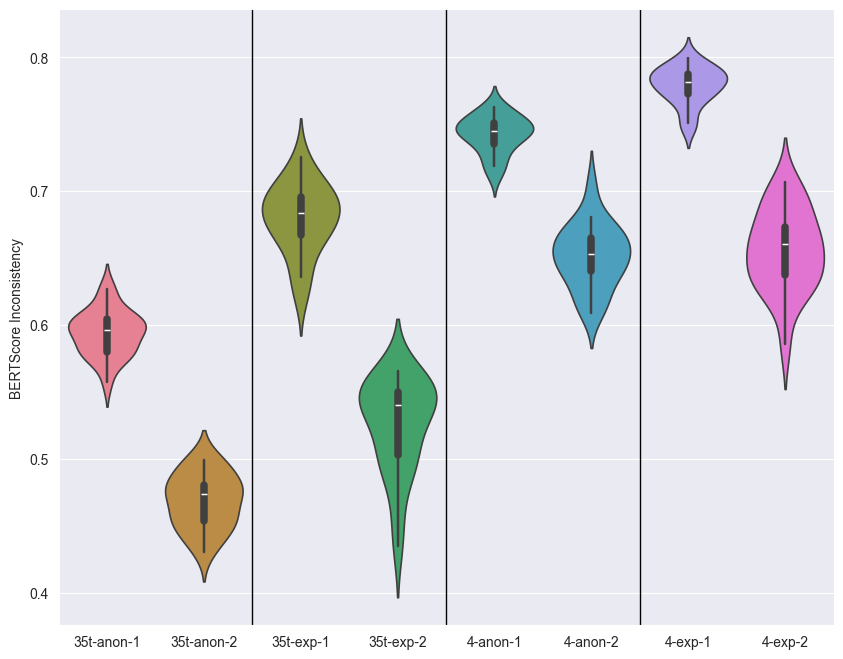

In [89]:
plt.figure(figsize=(10, 8))
sns.violinplot(all_bert, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [90]:
all_bidir = pd.DataFrame(
    [
        gpt35t_free_False_bidir[0], gpt35t_free_False_bidir[1],
        gpt35t_free_True_bidir[0], gpt35t_free_True_bidir[1],
        gpt4_free_False_bidir[0], gpt4_free_False_bidir[1],
        gpt4_free_True_bidir[0], gpt4_free_True_bidir[1],
    ]
).T

In [92]:
all_bidir.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

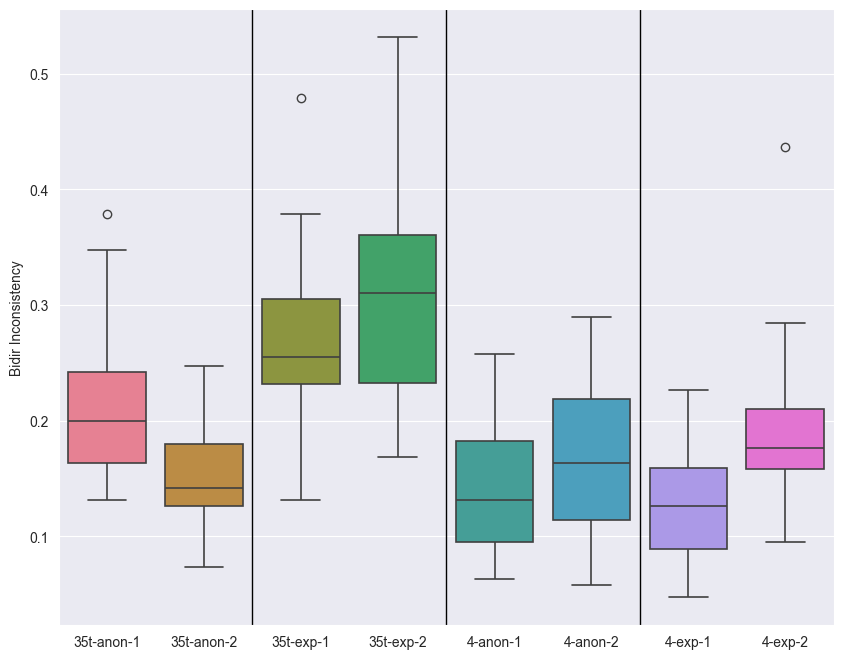

In [93]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_bidir, linewidth=1.2)
plt.ylabel('Bidir Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [110]:
np.load('')

[0.21052631578947367,
 0.13157894736842105,
 0.4789473684210526,
 0.3105263157894737,
 0.2578947368421053,
 0.30526315789473685,
 0.21578947368421053,
 0.14736842105263157,
 0.25263157894736843,
 0.37894736842105264,
 0.24210526315789474,
 0.24210526315789474,
 0.3263157894736842,
 0.29473684210526313,
 0.2578947368421053,
 0.18947368421052632,
 0.30526315789473685,
 0.24210526315789474,
 0.23684210526315788,
 0.26842105263157895]